# I-94 Interstate highway dataset analysis

The project is based on the data of the westbound traffic on the I-94 Interstate highway.

The goal of the analysis is to determine indicators of heavy traffic on I-94.

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

Let's take a look at first and last five rows and the dataset info:

In [2]:
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


traffic.tail(5)

In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


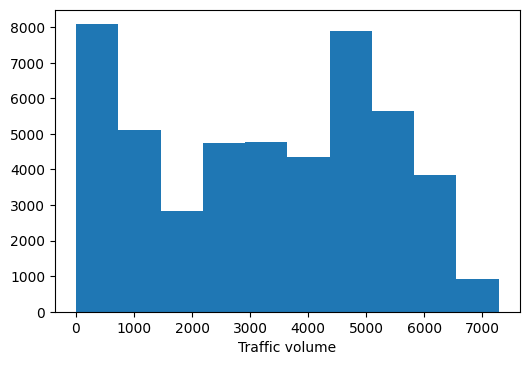

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(traffic['traffic_volume'])
plt.xlabel('Traffic volume')
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [7]:
daytime = traffic[(traffic['date_time'].dt.hour > 7) & (traffic['date_time'].dt.hour < 19)]
print(daytime['date_time'])


0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48194   2018-09-30 15:00:00
48195   2018-09-30 15:00:00
48196   2018-09-30 16:00:00
48197   2018-09-30 17:00:00
48198   2018-09-30 18:00:00
Name: date_time, Length: 21798, dtype: datetime64[ns]


In [8]:
nighttime = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour > 19)]
print(nighttime['date_time'])


11      2012-10-02 20:00:00
12      2012-10-02 21:00:00
13      2012-10-02 22:00:00
14      2012-10-02 23:00:00
15      2012-10-03 00:00:00
                ...        
48184   2018-09-30 06:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 22366, dtype: datetime64[ns]


(array([  37.,   69.,  409.,  641., 1379., 3746., 7689., 4489., 2826.,
         513.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <a list of 10 Patch objects>)

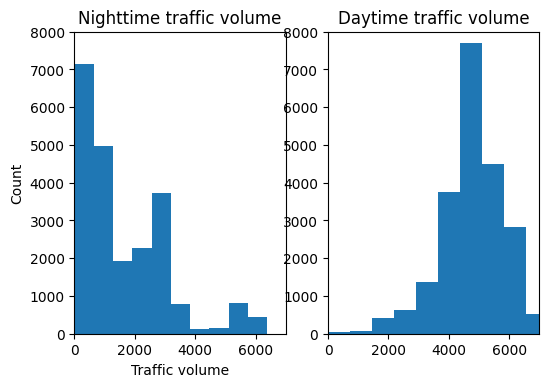

In [9]:
plt.plot()
plt.subplot(1,2,1)
plt.title('Nighttime traffic volume')
plt.xlim((0, 7000))
plt.ylim((0, 8000))
plt.xlabel('Traffic volume')
plt.ylabel('Count')
plt.hist(nighttime['traffic_volume'])
plt.subplot(1,2,2)
plt.title('Daytime traffic volume')
plt.xlim((0, 7000))
plt.ylim((0, 8000))
plt.hist(daytime['traffic_volume'])

In [10]:
nighttime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,22366.000000,22366.000000,22366.000000,22366.000000,22366.000000
mean,279.886677,0.140120,0.000209,45.113386,1654.648484
std,13.257728,1.125004,0.007752,40.183455,1425.175292
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.580000,0.000000,0.000000,1.000000,486.000000
50%,281.150000,0.000000,0.000000,40.000000,1056.500000
75%,290.400000,0.000000,0.000000,90.000000,2630.750000
max,306.290000,55.630000,0.510000,100.000000,6386.000000


In [11]:
daytime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,21798.000000,21798.000000,21798.000000,21798.000000,21798.000000
mean,282.616187,0.566004,0.000273,53.383109,4764.132948
std,13.233172,66.593320,0.009253,37.403446,1021.369570
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,273.000000,0.000000,0.000000,5.000000,4271.000000
50%,284.130000,0.000000,0.000000,75.000000,4792.000000
75%,293.987500,0.000000,0.000000,90.000000,5410.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [31]:
daytime.loc[:, 'month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4499.832053
2     4705.570170
3     4896.060371
4     4887.885428
5     4901.648341
6     4905.114035
7     4595.017576
8     4918.958227
9     4870.988249
10    4934.438125
11    4698.226291
12    4422.761261
Name: traffic_volume, dtype: float64

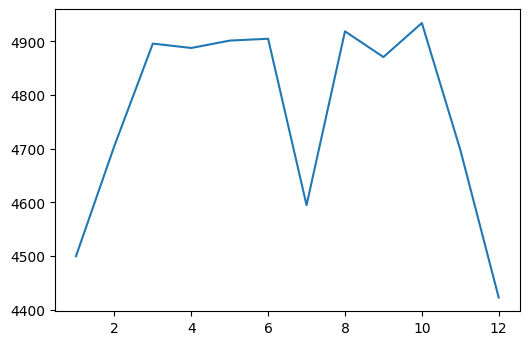

In [26]:
plt.plot(by_month['traffic_volume'])

Traffic is getting heavier since January to to October, with a exception for July.

In [33]:
daytime.loc[:, 'dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4807.164138
1    5109.419471
2    5207.297083
3    5228.966580
4    5220.602140
5    4119.368251
6    3652.753150
Name: traffic_volume, dtype: float64

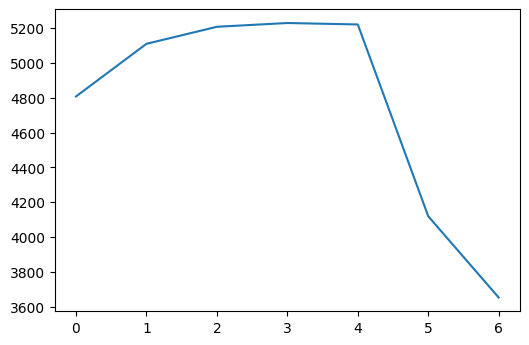

In [34]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

There is a much lighter traffic on weekends than business days.

hour
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


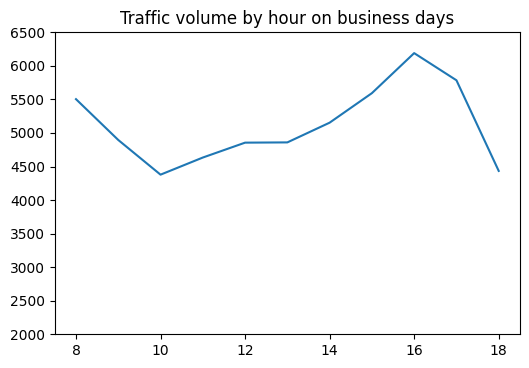

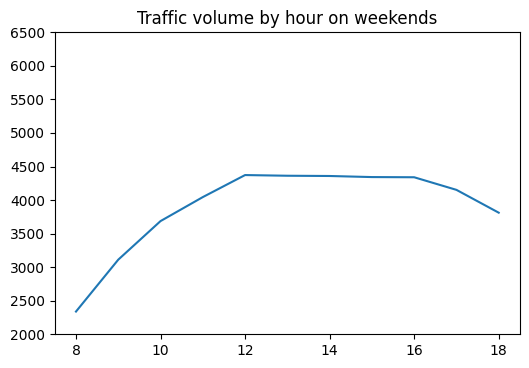

In [37]:
daytime.loc[:, 'hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

plt.plot(by_hour_business['traffic_volume'])
plt.ylim(2000, 6500)
plt.title('Traffic volume by hour on business days')
plt.show()

plt.title('Traffic volume by hour on weekends')
plt.ylim(2000, 6500)
plt.plot(by_hour_weekend['traffic_volume'])
plt.show()

For business hours, rush hours are 8 and 16.

On weekends, traffic is heavier starting from 10 to 18 but there are no spikes like on business days which are related to commuting to/from work.

In [17]:
traffic.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


 Temperature has the strongest correlation with traffic volume (0.130299).

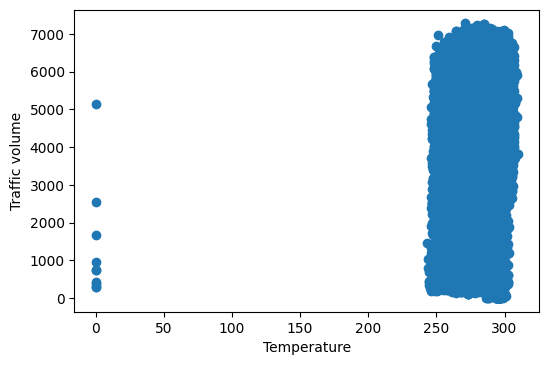

In [18]:
plt.scatter(traffic['temp'], traffic['traffic_volume'])
plt.xlabel('Temperature')
plt.ylabel('Traffic volume')
plt.show()

Looks like temperature cannot be used as a reliable indication of heavy traffic.

In [19]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [20]:
by_weather_main = daytime.groupby('weather_main').mean()
print(by_weather_main)


                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         284.499913  0.000000  0.000000    1.665401     4789.948377   
Clouds        283.362862  0.000000  0.000000   62.580415     4871.655732   
Drizzle       284.438498  0.168260  0.000000   84.913642     4830.045056   
Fog           276.243727  0.208376  0.001882   73.690037     4226.549815   
Haze          275.543741  0.040831  0.000000   64.435768     4617.103275   
Mist          279.285381  0.248566  0.000960   78.387408     4591.699908   
Rain          287.171281  4.262726  0.000318   76.101227     4808.569018   
Smoke         293.185455  0.958182  0.000000   54.545455     4781.181818   
Snow          268.053343  0.015346  0.001898   80.404367     4392.926958   
Squall        296.730000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  293.713507  1.055771  0.000000   74.763682     4642.902985   

           

In [21]:
by_weather_description = daytime.groupby('weather_description').mean()
print(by_weather_description)

                                           temp      rain_1h   snow_1h  \
weather_description                                                      
SQUALLS                              296.730000     1.020000  0.000000   
Sky is Clear                         293.992846     0.000000  0.000000   
broken clouds                        282.754435     0.000000  0.000000   
drizzle                              283.614735     0.127592  0.000000   
few clouds                           284.811127     0.000000  0.000000   
fog                                  276.243727     0.208376  0.001882   
freezing rain                        272.860000     0.000000  0.000000   
haze                                 275.543741     0.040831  0.000000   
heavy intensity drizzle              285.559167     0.333750  0.000000   
heavy intensity rain                 290.346804     2.750515  0.000000   
heavy snow                           269.417639     0.002639  0.000000   
light intensity drizzle              2

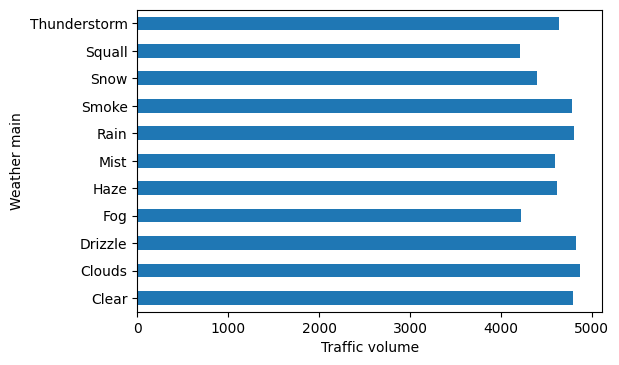

In [22]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic volume')
plt.ylabel('Weather main')
plt.show()

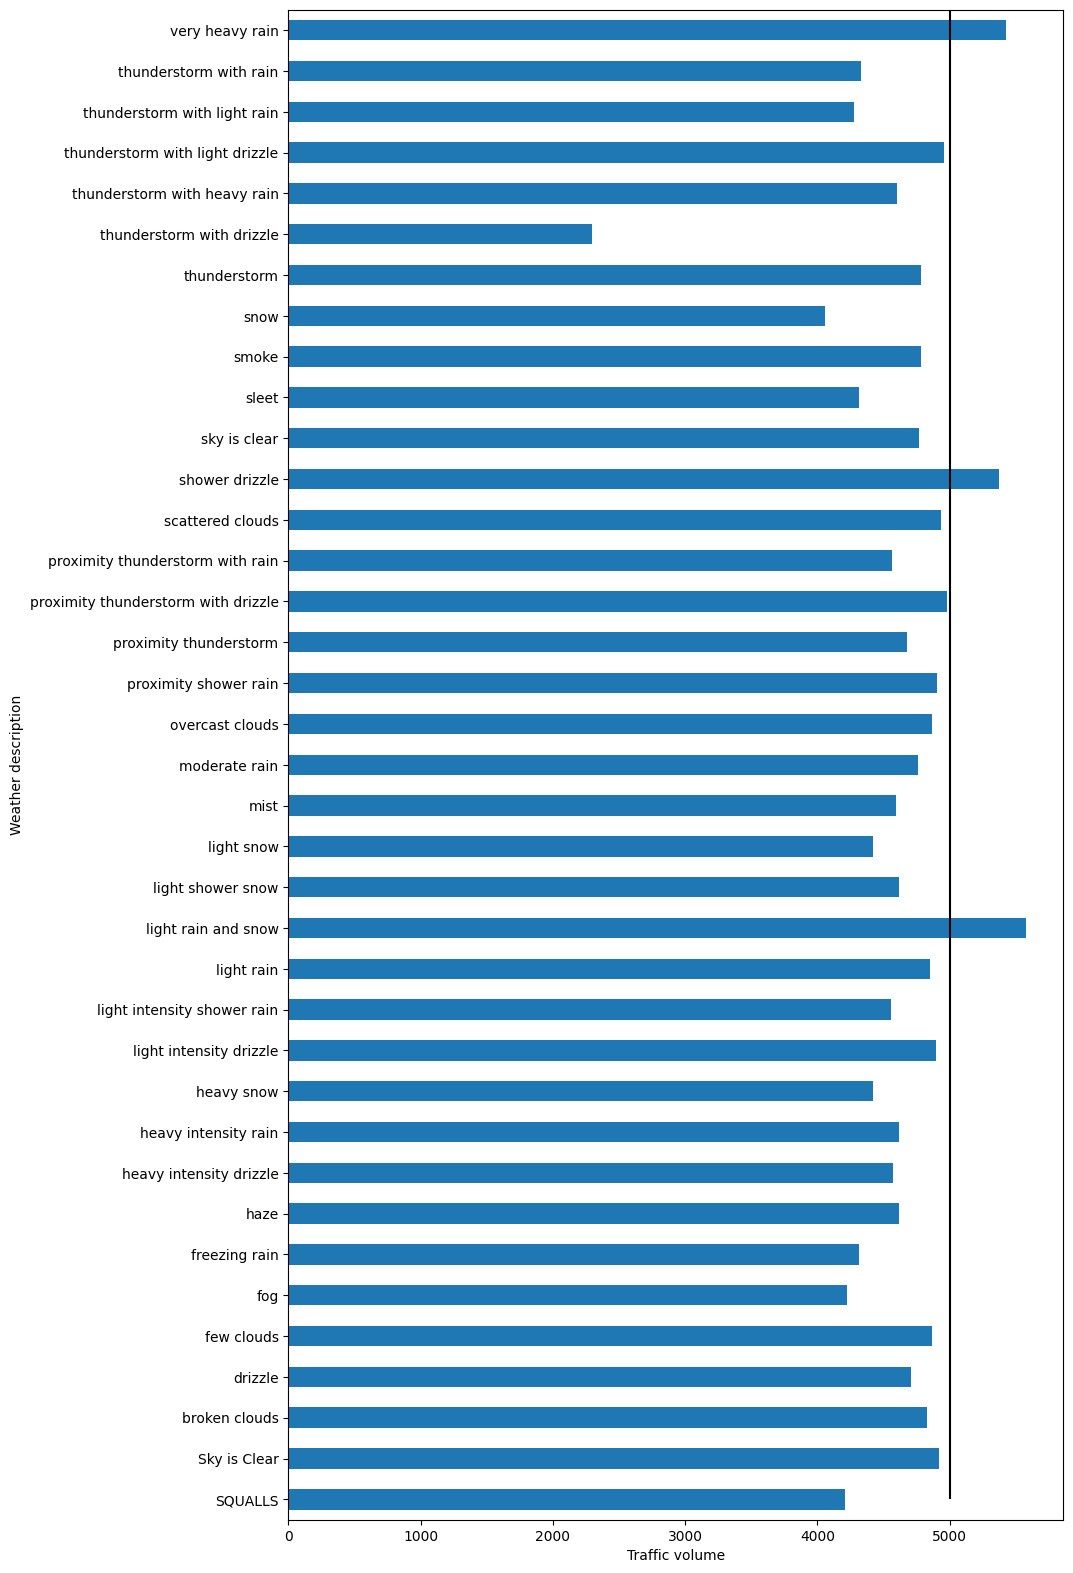

In [23]:
by_weather_description['traffic_volume'].plot.barh(figsize=(10,20))
plt.xlabel('Traffic volume')
plt.ylabel('Weather description')

plt.vlines(5000, ymin=0, ymax=100)
plt.show()

Very heavy rain, shower drizzle, light rain and snow could be a heavy traffic indicator (>5000 cars).